In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### 1. DATA INGESTION

In [304]:
customers = pd.read_csv("../data/maven_music_customers.csv")

customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [305]:
listening_history = pd.read_excel("../data/maven_music_listening_history.xlsx")
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [306]:
#audio data

audio =  pd.read_excel("../data/maven_music_listening_history.xlsx", sheet_name=1)

audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [307]:
#session data
sessions = pd.read_excel("../data/maven_music_listening_history.xlsx", sheet_name= 2)
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


### 2. DATA CLEANING

In [308]:
#checing the customer data types --- lot of objects to deal with!
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [309]:
#checking listening history data types --- looks good!
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [310]:
#checking the audio data types --- looks good!
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [311]:
#checking the session data types --- looks good!
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [312]:
#revisiting customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


##### Dealing with customer data

1. Convert objects to numeric and datetime fields

2. Resolve data issues -
- missing data
- inconsistent text and typos
- duplicates
- outliers

In [313]:
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN


In [314]:
# 1. chainging data types

customers['Member Since'] = pd.to_datetime(customers['Member Since'], format='%m/%d/%y')

customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].str.replace('$', ''))

customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'], format='%m/%d/%y')

                                           

In [315]:
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [316]:
# 2. Resolving data issues
# MISSING DATA

customers.isna().sum()


Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [317]:
# Look into Subscription Plan  --- all NaN Subscription Plans are $2.99
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [318]:
# check the unique Subscription Rates
customers[['Subscription Rate', 'Subscription Plan']].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,Basic (Ads)
1,2.99,NaN
6,9.99,Premium (No Ads)
15,99.99,Premium (No Ads)
21,7.99,Premium (No Ads)


In [319]:
# It looks like the $2.99 rate is for Basic plan, so fill missing SubscriptionPlan with 'Basic'
customers['Subscription Plan'] = customers['Subscription Plan'].fillna('Basic (Ads)')

customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [320]:
# Look into Discount? 
customers[['Customer ID', 'Discount?']].tail()

,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [321]:
# let's view it another way -- NaN seems to mean No
customers['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [322]:
# Lets change to numeric to make our life easier later

customers['Discount?'] = np.where(customers['Discount?'] =="Yes", 1 , 0)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [323]:
# Look into cancellation date -- NaN seems to mean not cancelled yet -- lets leave it as it is


* inconsistent text and typos



In [324]:
# Look like customers -- the subscription rate looks really high

customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [325]:
# look into the 99.99 -- looks like a typo
customers[customers['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [326]:
#Fix the 99.99 typo

customers.iloc[15,5] = 9.99

customers.iloc[[15]]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02


In [327]:
# Check the date range of customers

customers['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [328]:
# Look at listening history
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [329]:
# view the data
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [330]:
# Look at audio Type values -- looks good
listening_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [331]:
# look at the audio data
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [332]:
#look into Genre
audio.Genre.value_counts()

Genre
Pop Music     3
Comedy        3
Hip Hop       3
Country       2
Pop           2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [333]:
# Pop and Pop Music should be mapped to the same value

audio.Genre = np.where(audio.Genre == "Pop Music","Pop", audio.Genre)
audio.Genre.value_counts()

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [334]:
# Look at log in time range

sessions['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

* Duplicate rows

In [335]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [336]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [337]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [338]:
sessions[sessions.duplicated()]

,Session ID,Session Log In Time


* Outliers


In [339]:
#earlier we fixed 99.99 value
customers.describe()


,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


#### Create New columns
- Create new columns that will be useful for EDA and modelling
1. Cancelled: wether a customer cancelled or not
2. Email: Remove the "Email" from the email addresses

In [340]:
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT


In [341]:
#crete a 'Cancelled' column
customers['Cancelled'] = np.where(customers['Cancellation Date'].notna(), 1 ,0)
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0


In [342]:
# create an update Email column without the Email: portion
customers['Email']= customers['Email'].str[6:]
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0


# 3. EDA

Try to better understand the customers who cancelled:

* How loong were they members beore they cancelled?
* What percentage of customers who cancelled had a discount vs customers who did't cancel?

In [343]:
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0


In [344]:
# View the customers who cancelled
customers[customers['Cancellation Date'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1


In [345]:
# How long were customers members before they cancelled?
## About 1.5 months.... but that might just because we have 3 months of data

(customers['Cancellation Date'] - customers['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [346]:
# Calculate the cancellation rate for those who had a discount

discount_yes = customers[customers['Discount?'] == 1]
discount_yes.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [347]:
# Cancellation rate for those who had a discount
# 85 % of the people cancelled whohad discunt
discount_yes['Cancelled'].sum() / discount_yes['Cancelled'].count()

np.float64(0.8571428571428571)

In [348]:
# Calculate the cancellation rate for those who did not have a discount
discount_no = customers[customers['Discount?'] == 0]
discount_no.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [349]:
# Cancellation rate for those who did not have a discount
# 30 % of the people cancelled who did not have a discount

discount_no['Cancelled'].sum() / discount_no['Cancelled'].count()


np.float64(0.30434782608695654)

In [350]:
## Visualize the cancellation rate for those with a discount vs those without a discount -- this is a good insight

viz_df = pd.DataFrame(
    [['Had Discount', 0.8571428571428571],
    ['Did Not Have Discount', 0.30434782608695654]],
    columns=['Customer Type', 'Cancellation Rate']
)

viz_df

,Customer Type,Cancellation Rate
0,Had Discount,0.857143
1,Did Not Have Discount,0.304348


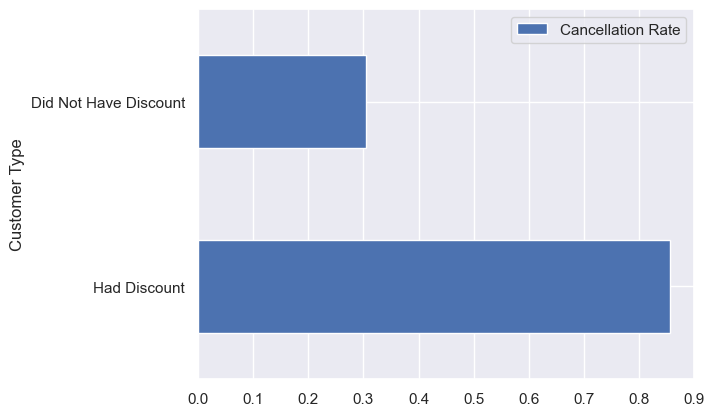

In [351]:
viz_df.plot.barh(x ="Customer Type", y = 'Cancellation Rate');

Better understand the customers listening histories:

- Join together the listening history and audio tables
- How many listening sesssions did each customer have in the past 3 months?
- What were the most popular genres that customers listened to?

In [352]:
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0


In [353]:
listening_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [354]:
audio.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [355]:
sessions.head(2)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00


In [356]:
# Split the Id in the Audio so the column can be joined with other tables

audio_clean = pd.DataFrame((audio['ID'].str.split('-').tolist())).rename(columns={0:'Type',1:'Audio ID'})
audio_clean.head()

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [357]:
# Add the new fileds to the original audio table

audio_all = pd.concat([audio_clean,  audio], axis= 1)
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [358]:
listening_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [359]:
#check the datatype of audio ID in the audio table
# here it is object type
audio_all.dtypes

Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [360]:
# here Audio ID is int
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [361]:
# Change Audio Id to an int type instead of an object

audio_all['Audio ID'] = audio_all['Audio ID'].astype('int')
audio_all.dtypes

Type          object
Audio ID       int64
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [362]:
# Now merging is possible
df = listening_history.merge(audio_all, how='left', on= "Audio ID")
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


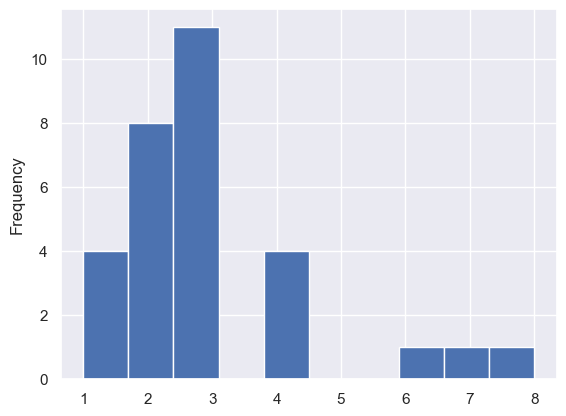

In [363]:
# The number of listening sessions that each customer had in the past 3 months

df.groupby('Customer ID')['Session ID'].nunique().plot.hist();

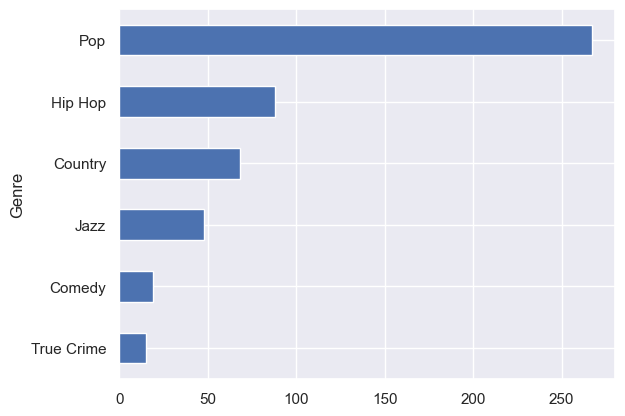

In [364]:
# The most popular genres that customers listened to

df.Genre.value_counts(ascending= True).plot.barh();

# 4. Prep For Modeling

Create a DataFrame that is reday for modelling with each row representing a customer and the following numeric, non-null columns:

- Customer ID
- Whethere a customer cnacelled or not
- Whether a customer received a discount ot not
- The number of listening sessions
- Percent of listening hsitory consisting Pop
- Percetnof listening history consisting of Podcasts

In [365]:
# Create a dataframe ready for modeling

model_df = customers[["Customer ID", "Cancelled", "Discount?"]]
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [366]:
#Calculate the number of listening sessions for each customers

number_of_sessions = df.groupby("Customer ID")['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [367]:
# Add it to the modelling dataframe
model_df = model_df.merge(number_of_sessions, how="left", on="Customer ID")
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [368]:
#calculate dummy varaibles for each genre

pd.get_dummies(df.Genre , dtype= int, drop_first= True)

,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
500,0,0,1,0,0
501,0,0,0,0,0
502,0,1,0,0,0
503,0,1,0,0,0


In [369]:
#combine it with the customer ID

pd.concat([df['Customer ID'],pd.get_dummies(df.Genre,dtype= int)],axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0
501,6588,1,0,0,0,0,0
502,5763,0,0,1,0,0,0
503,5763,0,0,1,0,0,0


In [370]:
#Group it by customer

genres = pd.concat([df['Customer ID'],pd.get_dummies(df.Genre,dtype= int)],axis=1).groupby("Customer ID").sum().reset_index()

genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [371]:
# Add a column for total songs / podcasts listened to

total_audio = listening_history.groupby("Customer ID")["Audio ID"].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [372]:
# create a master audio table to calculate percentages

df_audio = genres.merge(total_audio, how= "left", on="Customer ID")
df_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [373]:
#percent pop
model_df['Percent Pop'] = round(df_audio.Pop / df_audio['Total Audio'] * 100,2)
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop
0,5001,0,0,8,56.67
1,5002,0,0,4,0.00
2,5004,1,0,1,100.00
3,5267,0,0,7,51.11
4,5338,0,0,4,0.00


In [374]:
# Percent podcast
model_df['Percent Podcasts'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcasts
0,5001,0,0,8,56.67,0.0
1,5002,0,0,4,0.00,0.0
2,5004,1,0,1,100.00,0.0
3,5267,0,0,7,51.11,0.0
4,5338,0,0,4,0.00,0.0


Visualize the relationships in the modeling DataFrame using a pairplot:

- What variables might do a good job predecting customer cancellation

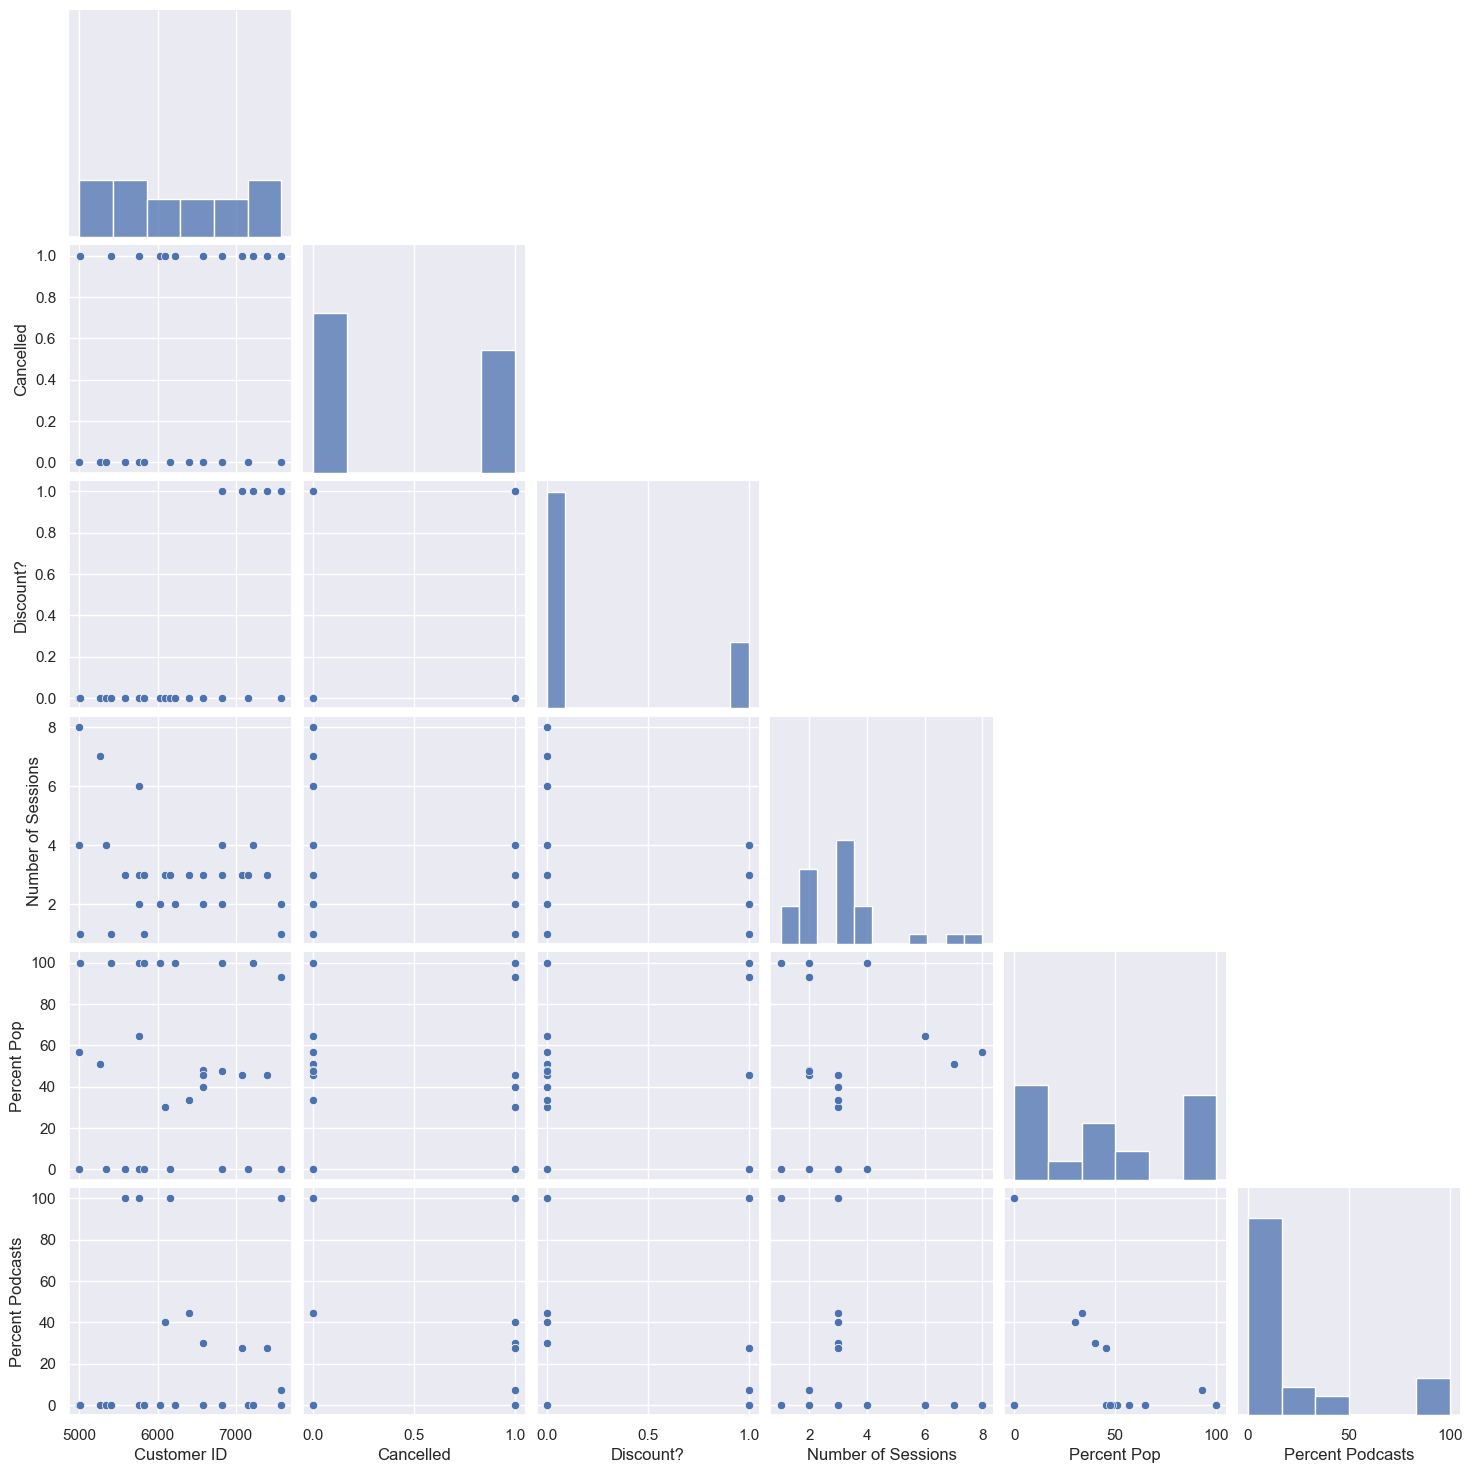

In [377]:
sns.pairplot(model_df, corner= True);

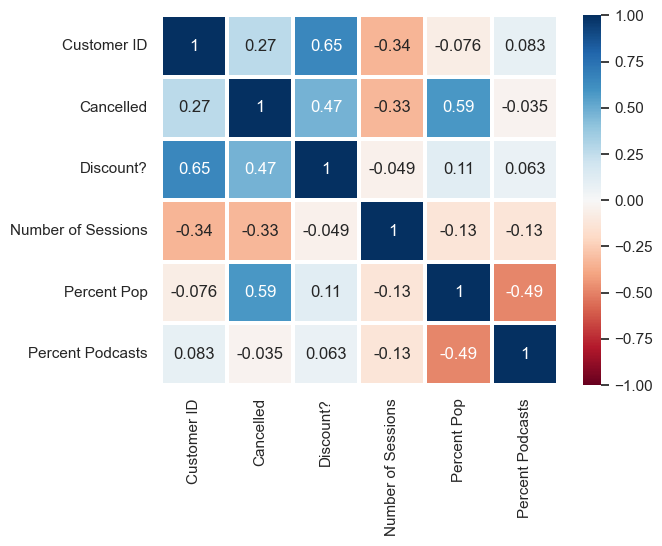

In [384]:
sns.heatmap(model_df.corr(), annot= True, vmin=-1, vmax=1, cmap="RdBu", linewidths=1.5);

### OBSERVATIONS

- A discount is correlated with a cancellation
- The more listening sessions,  the fewer cancellation
- The more pop music, the more cancellation
